In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt


In [152]:
data = pd.read_csv("/content/covid_19_data.csv")
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [153]:
data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
236012,236013,02/27/2021,Zaporizhia Oblast,Ukraine,2021-02-28 05:22:20,69504,1132,65049
236013,236014,02/27/2021,Zeeland,Netherlands,2021-02-28 05:22:20,16480,178,0
236014,236015,02/27/2021,Zhejiang,Mainland China,2021-02-28 05:22:20,1321,1,1314
236015,236016,02/27/2021,Zhytomyr Oblast,Ukraine,2021-02-28 05:22:20,50582,834,44309
236016,236017,02/27/2021,Zuid-Holland,Netherlands,2021-02-28 05:22:20,255335,3732,0


The Data is from 22nd Jan 2020 to 27th feb 2021

In [154]:
print("shape of the covid data is {}".format(data.shape))

shape of the covid data is (236017, 8)


In [155]:
print("data types in data set are: {}".format(data.dtypes))

data types in data set are: SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


Checking for the Null Values:

In [156]:
print("Null Values in the data set: {}".format(data.isnull().sum()))

Null Values in the data set: SNo                    0
ObservationDate        0
Province/State     62045
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


Dropping the serial no column

In [157]:
data.drop(["SNo"],axis=1,inplace=True)

In [158]:
data.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


Converting the ObservationDate to year-month-date format

In [159]:
data["ObservationDate"] = pd.to_datetime(data["ObservationDate"])

In [160]:
data.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0,0,0


Grouping Different types of cases as per the date

In [161]:
date_wise_cases = data.groupby("ObservationDate").agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

Getting the Information from the data set like total Confirmed cases,Active Cases,Recovered cases,dead cases,closed cases

In [162]:
print("Total number of Confirmed cases around the world",date_wise_cases["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",date_wise_cases["Recovered"].iloc[-1])
print("Total number of Death cases around the world",date_wise_cases["Deaths"].iloc[-1])
print("Total number of Active cases around the world",(date_wise_cases["Confirmed"].iloc[-1]-date_wise_cases["Recovered"].iloc[-1]-date_wise_cases["Deaths"].iloc[-1]))
print("Total number of Closed cases around the world",(date_wise_cases["Recovered"].iloc[-1]+date_wise_cases["Deaths"].iloc[-1]))

Total number of Confirmed cases around the world 113784735.0
Total number of Recovered cases around the world 64243285.0
Total number of Death cases around the world 2525401.0
Total number of Active cases around the world 47016049.0
Total number of Closed cases around the world 66768686.0


Lets see the distribution of Active Cases

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

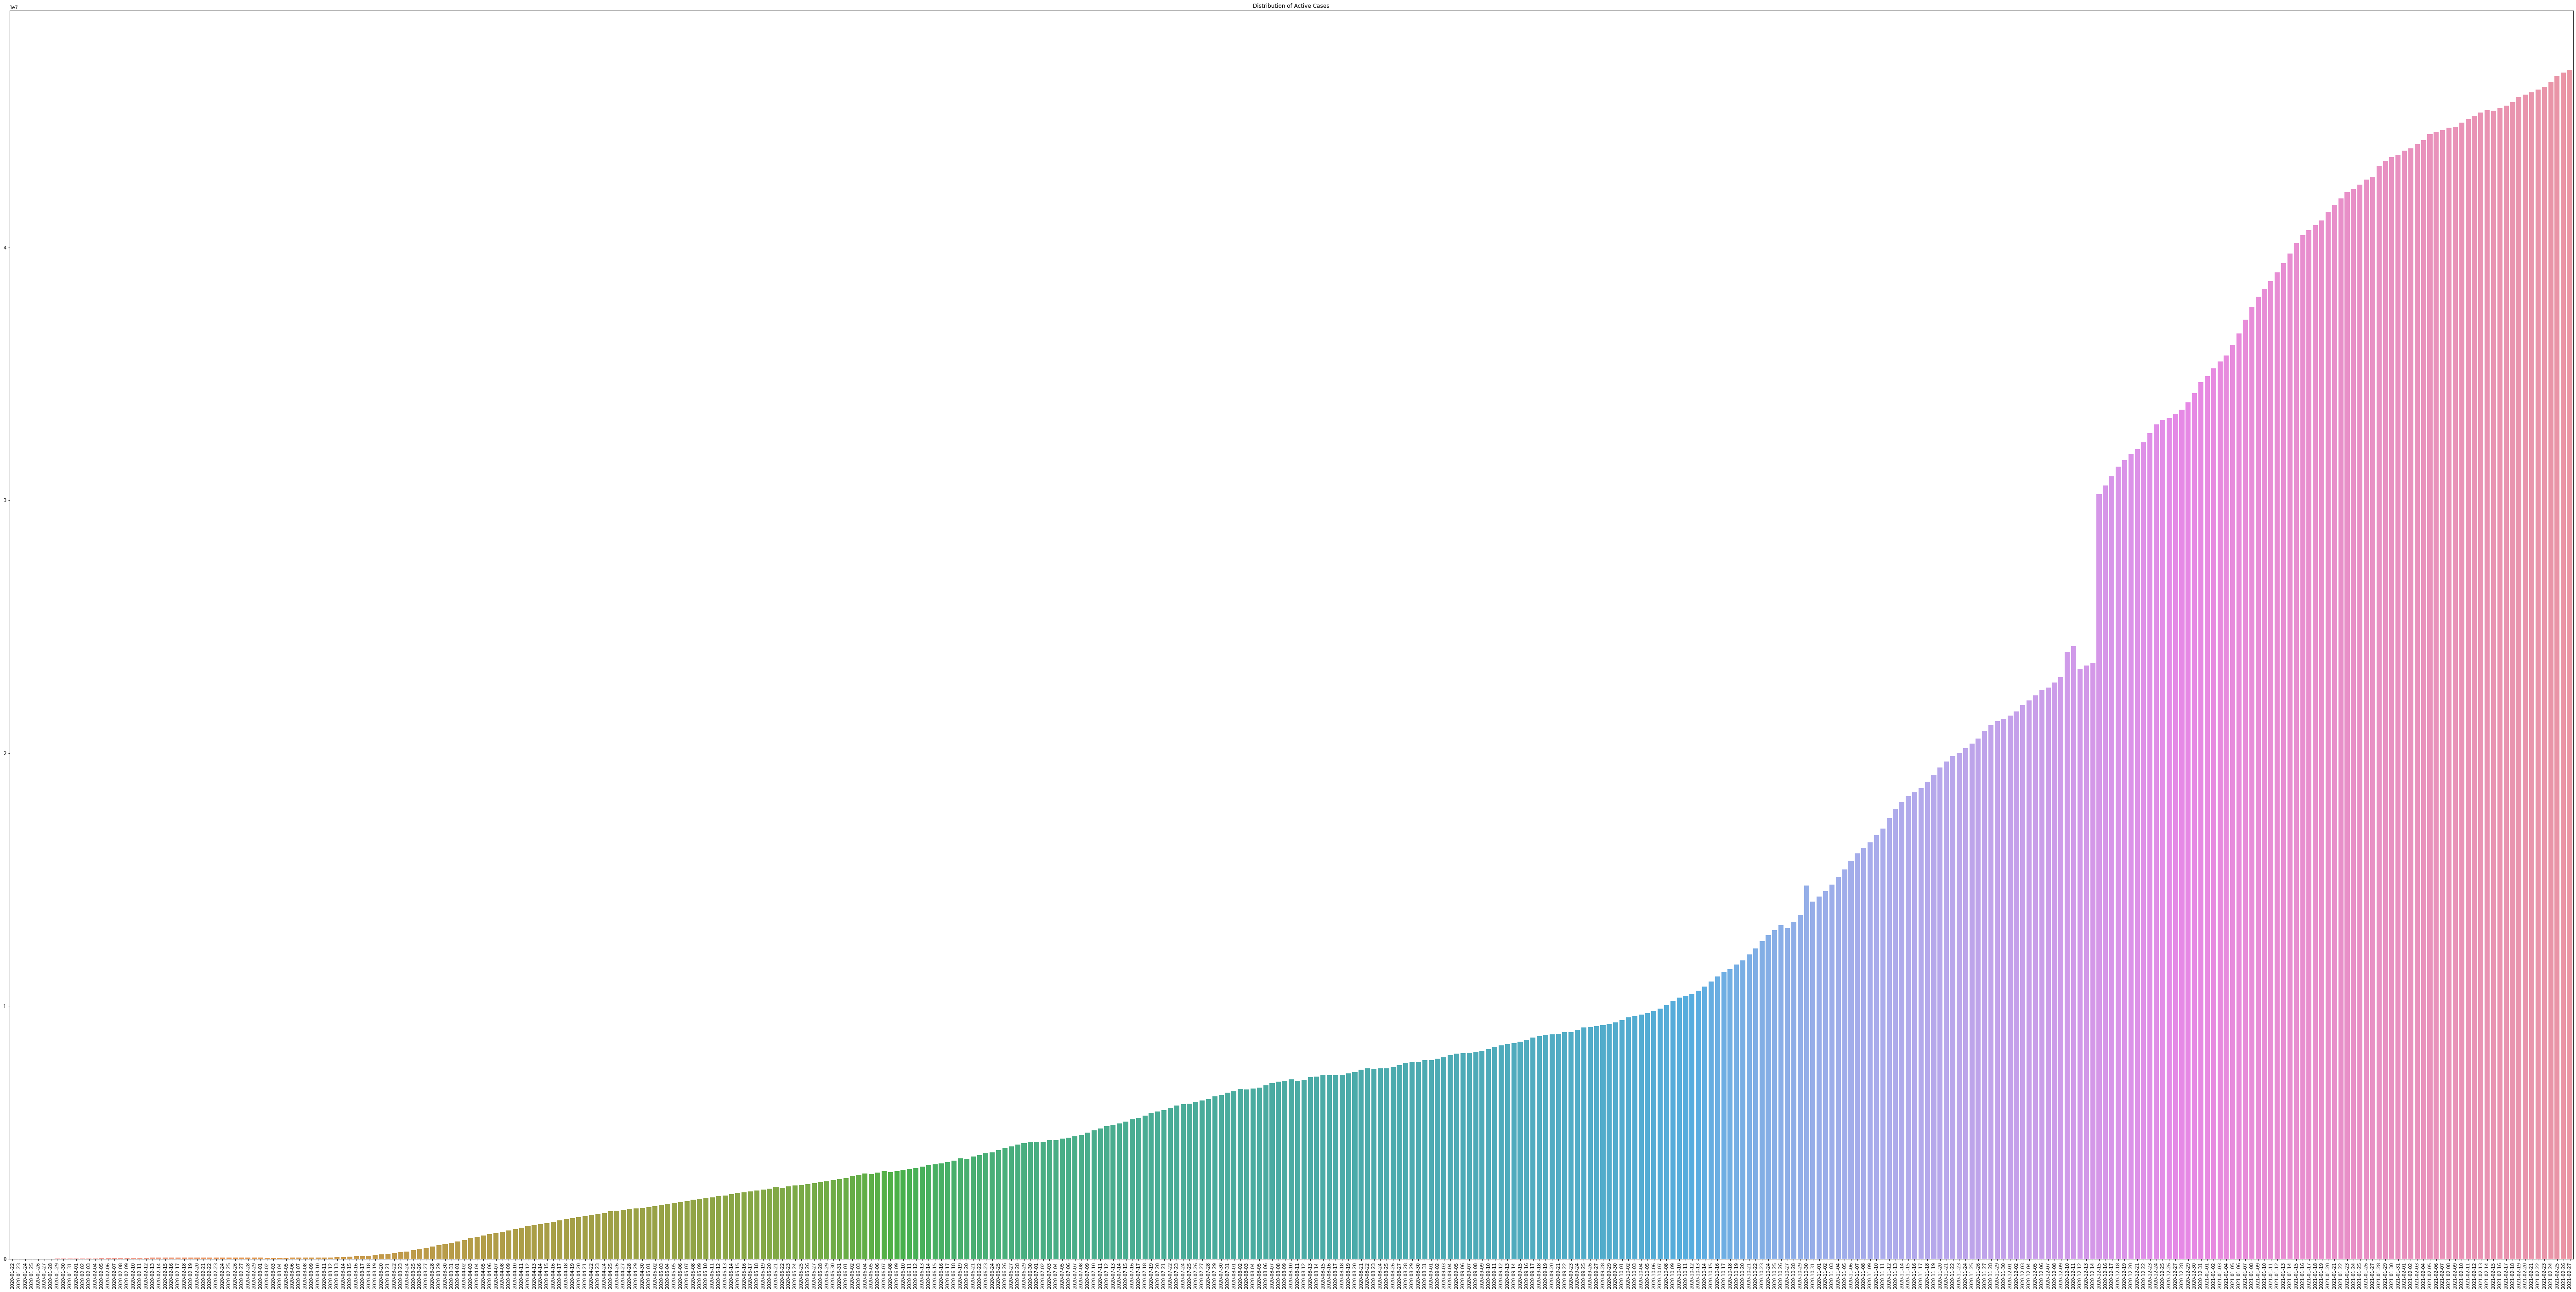

In [163]:
plt.figure(figsize=(100,50))
sns.barplot(x=date_wise_cases.index.date,y=date_wise_cases["Confirmed"]-date_wise_cases["Recovered"]-date_wise_cases["Deaths"])
plt.title("Distribution of Active Cases")
plt.xticks(rotation=90)

From the above Distribution of the active cases we can see that the cases are increasing.


Lest see the Distribution of Closed Cases

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

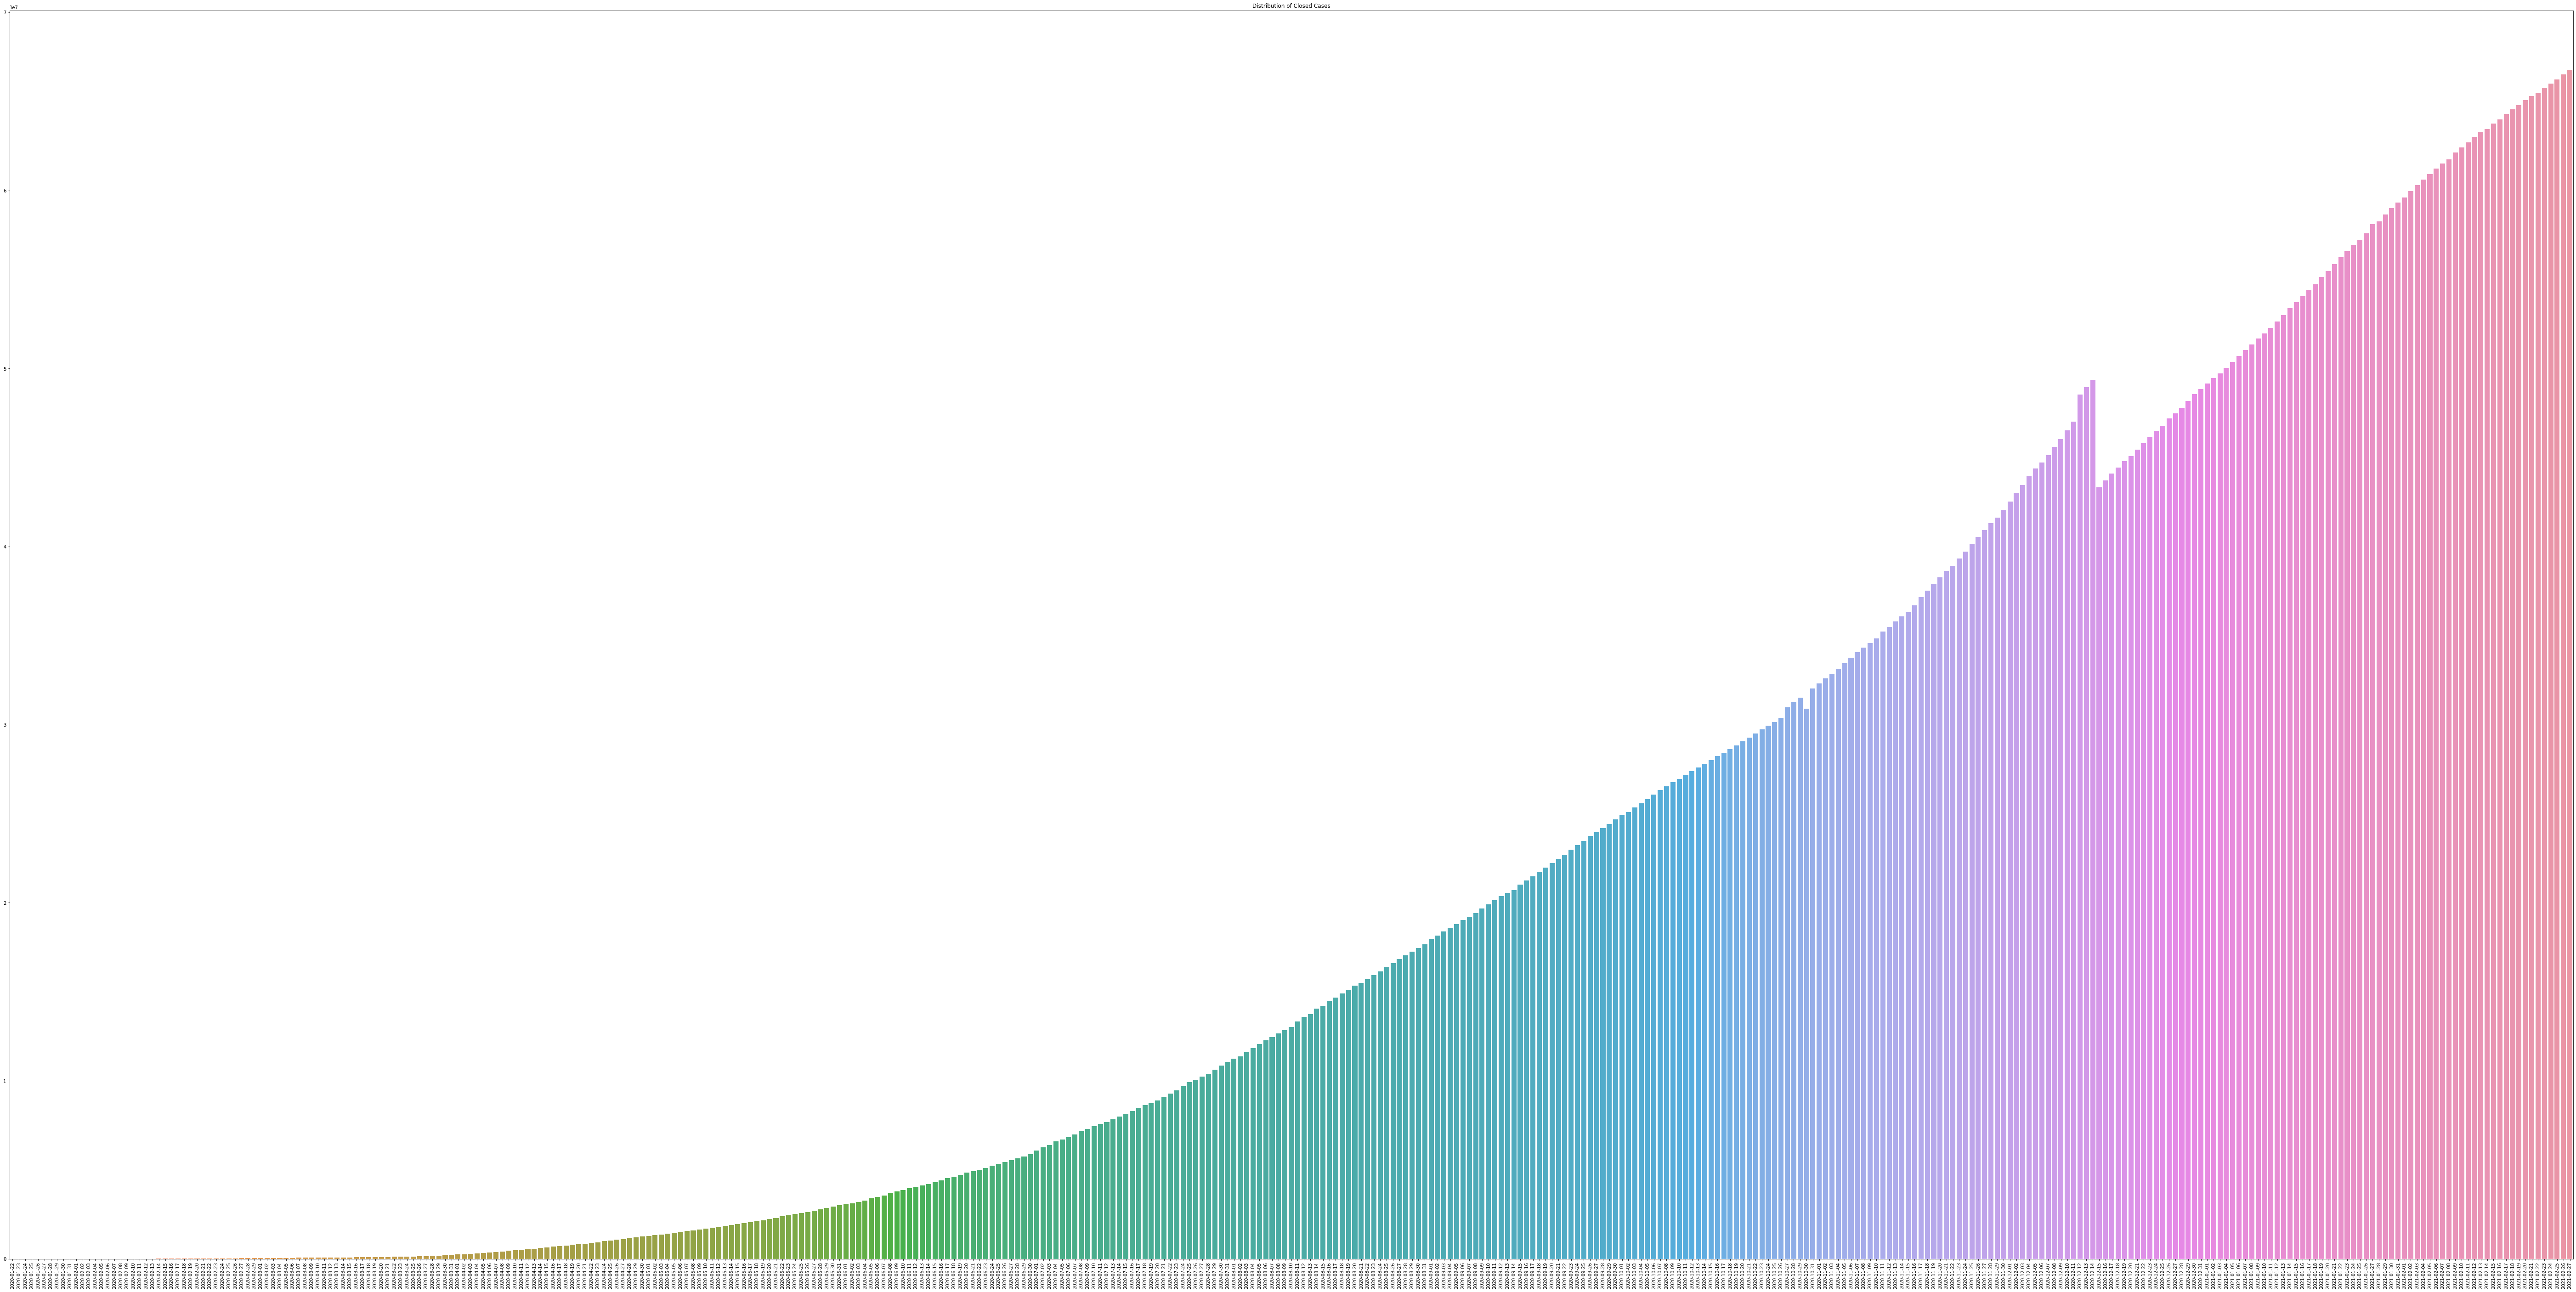

In [164]:
plt.figure(figsize=(100,50))
sns.barplot(x=date_wise_cases.index.date,y=date_wise_cases["Recovered"]+date_wise_cases["Deaths"])
plt.title("Distribution of Closed Cases")
plt.xticks(rotation=90)

Checking for the weekly Progress of different type of cases:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


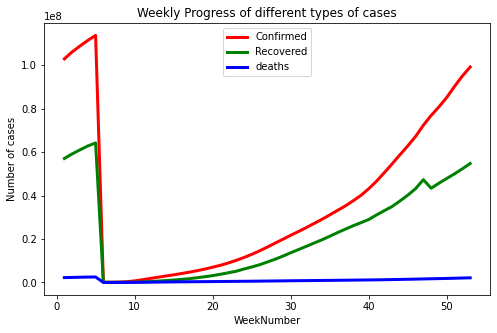

In [165]:
date_wise_cases["Weekly_cases"] = date_wise_cases.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(date_wise_cases["Weekly_cases"].unique()):
    weekwise_confirmed.append(date_wise_cases[date_wise_cases["Weekly_cases"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(date_wise_cases[date_wise_cases["Weekly_cases"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(date_wise_cases[date_wise_cases["Weekly_cases"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3,color="Red",label="Confirmed")
plt.plot(week_num,weekwise_recovered,linewidth =3,color="Green",label="Recovered")
plt.plot(week_num,weekwise_deaths,linewidth = 3,color="Blue",label="deaths")
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")
plt.legend()

Here we can see that the cases have been increased in between 0th and some where around 5th to 6th week.

from the 10th week the cases have started increasig exponentially


Lets see the weekly increase in confirmed cases and deaths 

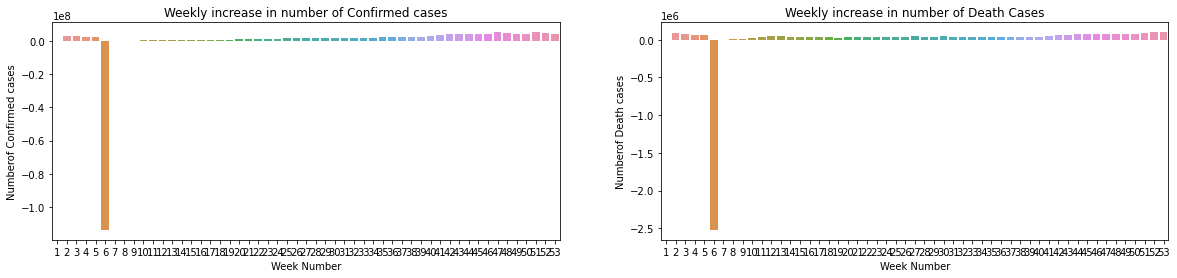

In [166]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,4))
sns.barplot(x= week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x= week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Numberof Confirmed cases")
ax2.set_ylabel("Numberof Death cases")
ax1.set_title("Weekly increase in number of Confirmed cases")
ax2.set_title("Weekly increase in number of Death Cases")
plt.show()

Lets see the Avg increase in the different types of cases

In [167]:
print("Average increase in number of Confirmed cases everyday: {}".format(np.round(date_wise_cases["Confirmed"].diff().fillna(0).mean())))
print("Average increase in number of Recovered cases everyday: {}".format(np.round(date_wise_cases["Recovered"].diff().fillna(0).mean())))
print("Average increase in number of Death cases everyday: {}".format(np.round(date_wise_cases["Deaths"].diff().fillna(0).mean())))

Average increase in number of Confirmed cases everyday: 282343.0
Average increase in number of Recovered cases everyday: 159413.0
Average increase in number of Death cases everyday: 6266.0


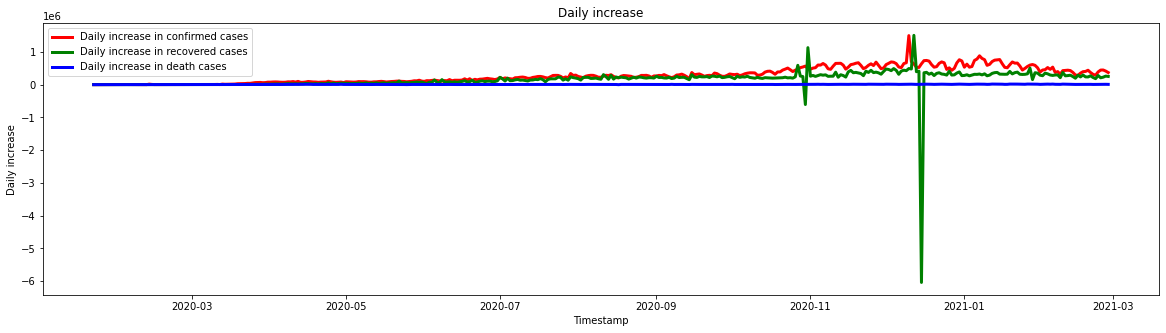

In [168]:
plt.figure(figsize=(20,5))
plt.plot(date_wise_cases["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3,color="Red")
plt.plot(date_wise_cases["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3,color="Green")
plt.plot(date_wise_cases["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth=3,color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.show()

Lest see the Country wise Analysis

In [169]:
countrywise= data[data["ObservationDate"]==data["ObservationDate"].max()].groupby("Country/Region").agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)


In [170]:
countrywise

,Confirmed,Recovered,Deaths
Country/Region,,,
US,28554465,0,511994
India,11096731,10775169,157051
Brazil,10517232,9371448,254221
Russia,4187166,3756808,84330
UK,4182772,11602,122939
...,...,...,...
MS Zaandam,9,7,2
Marshall Islands,4,4,0
Samoa,3,2,0


Here we can see that US,India,Brazil,Russia followed by UK are with Highest Confirmed cases.

Finding the mortality rate 

In [171]:
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["Recovered"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

In [172]:
print("country wise Mortality {}".format(countrywise["Mortality"]))
print("country wise Recovered {}".format(countrywise["Recovered"]))

country wise Mortality Country/Region
US                  inf
India                 1
Brazil                3
Russia                2
UK                 1060
                   ... 
MS Zaandam           29
Marshall Islands      0
Samoa                 0
Vanuatu               0
Micronesia            0
Name: Mortality, Length: 194, dtype: float64
country wise Recovered Country/Region
US                   0
India               97
Brazil              89
Russia              90
UK                   0
                    ..
MS Zaandam          78
Marshall Islands   100
Samoa               67
Vanuatu            100
Micronesia         100
Name: Recovered, Length: 194, dtype: float64


lets see top 15 confirmed and Death countries

Text(0.5, 1.0, 'Top 15 countries as per number of death cases')

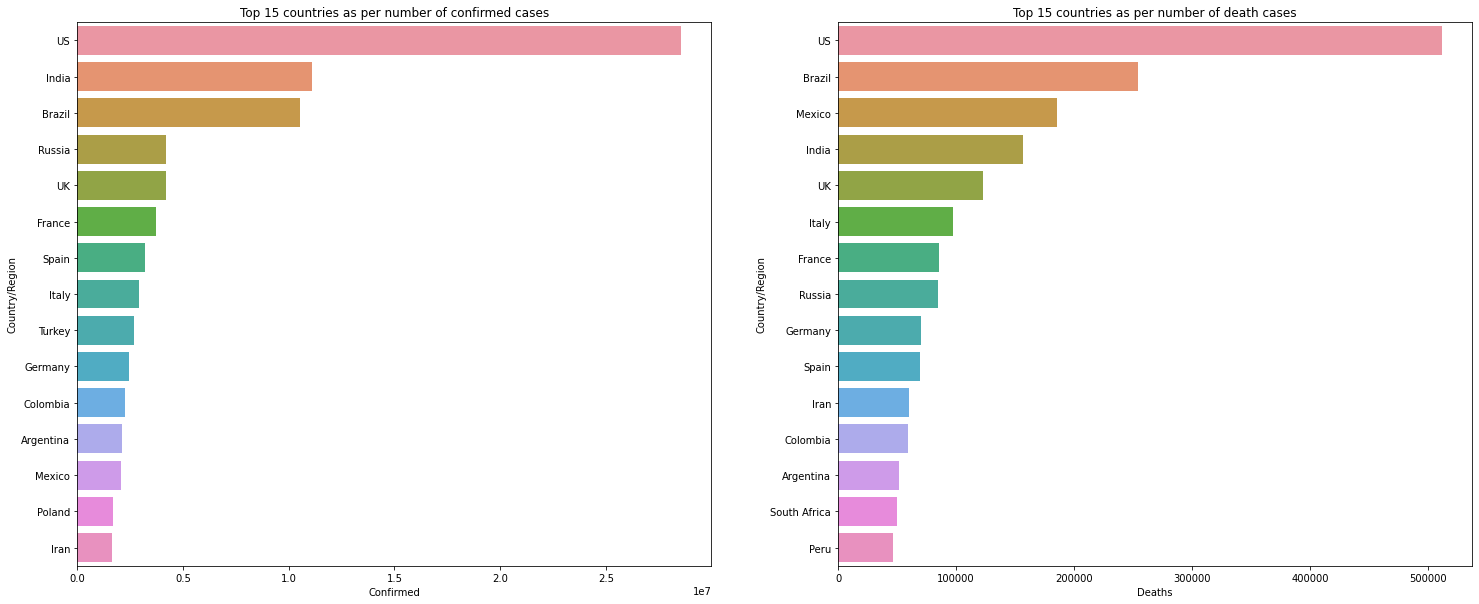

In [173]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per number of confirmed cases")
sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per number of death cases")

 ANALYSIS FOR INDIA:

In [174]:
india_data = data[data["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Active Cases",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed   11096731
Recovered   10775169
Deaths        157051
Name: 2021-02-27 00:00:00, dtype: float64
Total Active Cases 164511.0
Total Closed Cases 10932220.0


ANALYSIS FOR US:

In [175]:
Us_data = data[data["Country/Region"]=="India"]
datewise_Us = Us_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_Us.iloc[-1])
print("Total Active Cases",datewise_Us["Confirmed"].iloc[-1]-datewise_Us["Recovered"].iloc[-1]-datewise_Us["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_Us["Recovered"].iloc[-1]+datewise_Us["Deaths"].iloc[-1])

Confirmed   11096731
Recovered   10775169
Deaths        157051
Name: 2021-02-27 00:00:00, dtype: float64
Total Active Cases 164511.0
Total Closed Cases 10932220.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


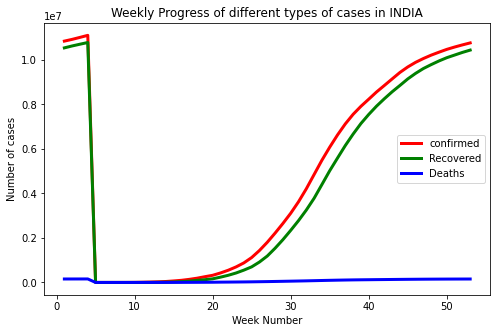

In [176]:
datewise_india["Weekly_cases"] = datewise_india.index.weekofyear
week_num_india = []
india_weekwise_confirmed = []
india_weekwise_recovered = []
india_weekwise_deaths = []
w = 1
for i in list(datewise_india["Weekly_cases"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["Weekly_cases"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["Weekly_cases"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["Weekly_cases"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3,label="confirmed",color="Red")
plt.plot(week_num_india,india_weekwise_recovered,linewidth =3,label="Recovered",color="Green")
plt.plot(week_num_india,india_weekwise_deaths,linewidth = 3,label="Deaths",color="Blue")
plt.xlabel("Week Number")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases in INDIA")
plt.legend()
plt.show()

Comparing different Countries with India to reach total number of Confirmed cases in INDIA:


In [177]:
max_ind = datewise_india["Confirmed"].max()
china_data = data[data["Country/Region"]=="Mainland China"]
Italy_data = data[data["Country/Region"]=="Italy"]
US_data = data[data["Country/Region"]=="US"]
spain_data = data[data["Country/Region"]=="Spain"]
datewise_china = china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_US=US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Spain=spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed Cases")
print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach number of Confirmed Cases")
print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in US to reach number of Confirmed Cases")
print("It took",datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)].shape[0],"days in Spain to reach number of Confirmed Cases")
print("It took",datewise_china[(datewise_china["Confirmed"]>0)&(datewise_china["Confirmed"]<=max_ind)].shape[0],"days in China to reach number of Confirmed Cases")

It took 395 days in India to reach 11096731.0 Confirmed Cases
It took 394 days in Italy to reach number of Confirmed Cases
It took 298 days in US to reach number of Confirmed Cases
It took 393 days in Spain to reach number of Confirmed Cases
It took 403 days in China to reach number of Confirmed Cases


In [178]:
date_wise_cases["Days Since"]=date_wise_cases.index-date_wise_cases.index[0]
date_wise_cases["Days Since"] = date_wise_cases["Days Since"].dt.days
train = date_wise_cases.iloc[:int(date_wise_cases.shape[0]*0.95)]
test = date_wise_cases.iloc[:int(date_wise_cases.shape[0]*0.95):]
model_scores=[]

In [179]:
date_wise_cases["Days Since"]

ObservationDate
2020-01-22      0
2020-01-23      1
2020-01-24      2
2020-01-25      3
2020-01-26      4
             ... 
2021-02-23    398
2021-02-24    399
2021-02-25    400
2021-02-26    401
2021-02-27    402
Name: Days Since, Length: 403, dtype: int64

In [180]:
lin_reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train["Days Since"]).reshape(-1,1),np.array(train["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train["Days Since"]).reshape(-1,1),np.array(train["Confirmed"]).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [181]:
prediction_valid_lin_reg = lin_reg.predict(np.array(test["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(test["Days Since"]).reshape(-1,1))

In [182]:
new_date = []
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,50):
  new_date.append(date_wise_cases.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(date_wise_cases["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(date_wise_cases["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(50)

,Dates,LR,SVR
0,2021-02-28,85452798,36905991
1,2021-03-01,85717188,37154171
2,2021-03-02,85981577,37404821
3,2021-03-03,86245967,37657958
4,2021-03-04,86510357,37913602
5,2021-03-05,86774746,38171770
6,2021-03-06,87039136,38432483
7,2021-03-07,87303526,38695757
8,2021-03-08,87567915,38961612
9,2021-03-09,87832305,39230068


Lets forcast with time series anlaysis

In [183]:
model_train = date_wise_cases.iloc[:int(date_wise_cases.shape[0]*0.85)]
model_test = date_wise_cases.iloc[int(date_wise_cases.shape[0]*0.85):]

In [184]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = model_test.copy()
y_pred["Holt"]=holt.forecast(len(model_test))

In [185]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,50):
   holt_new_date.append(date_wise_cases.index[-1]+timedelta(days=i))
   holt_new_prediction.append(holt.forecast((len(model_test)+i))[-1])

model_predictions["Holts Linear Model Prediction"]=holt_new_prediction
model_predictions.head(50)

,Dates,LR,SVR,Holts Linear Model Prediction
0,2021-02-28,85452798,36905991,115700882
1,2021-03-01,85717188,37154171,116254478
2,2021-03-02,85981577,37404821,116808074
3,2021-03-03,86245967,37657958,117361670
4,2021-03-04,86510357,37913602,117915266
5,2021-03-05,86774746,38171770,118468862
6,2021-03-06,87039136,38432483,119022457
7,2021-03-07,87303526,38695757,119576053
8,2021-03-08,87567915,38961612,120129649
9,2021-03-09,87832305,39230068,120683245
